<a href="https://colab.research.google.com/github/SamuelRoblesArce/Machine_Learning/blob/main/0_DineroFelicidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dinero trae felicidad?**

- Aprendizaje supervisado
- Problema de regresión
- Aprendizaje en batch

In [ ]:
# Importación de librerías principales
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

Esta función junta los datos del índice de satisfacción de la OCDE y el índice FMI del PBI (GDP) per capita.

In [ ]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

**Carga de Datos (Github)**

In [ ]:
url_1 = "https://raw.githubusercontent.com/eduardool/MaestriaCienciaDatos/main/datasets/oecd_bli_2015.csv"
url_2 = "https://raw.githubusercontent.com/eduardool/MaestriaCienciaDatos/main/datasets/gdp_per_capita.csv"

In [ ]:
# carga en Dataframes
oecd_bli = pd.read_csv(url_1, thousands=',')
gdp_per_capita = pd.read_csv(url_2,thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

**Preparación de los datos (unión)**

In [ ]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [ ]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


**Selección de variables**

In [ ]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [ ]:
X.shape

(29, 1)

**Visualización de los datos**

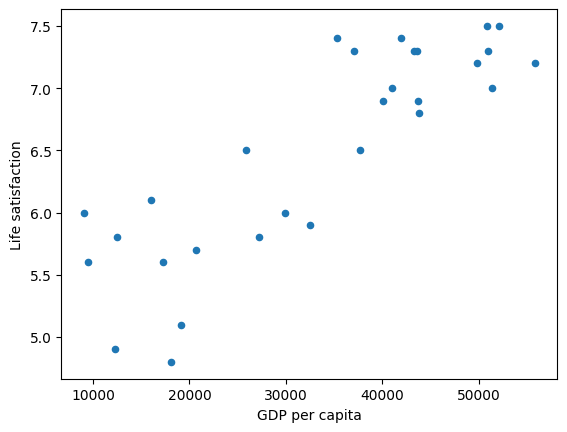

In [ ]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

**Selección del Modelo Lineal**

In [ ]:
model = sklearn.linear_model.LinearRegression()



**Aprendizaje (ML) batch**

In [ ]:
model.fit(X, y)

LinearRegression()

**Parámetros $\theta_0$ y $\theta_1$ aprendidos**

In [ ]:
t0, t1 = model.intercept_[0], model.coef_[0][0]

In [ ]:
t0

4.853052800266436

In [ ]:
t1

4.911544589158484e-05

**Visualización del modelo aprendido**

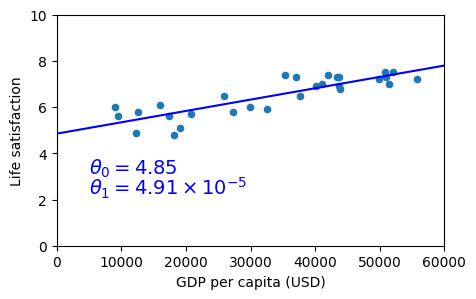

In [ ]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

**Predicción índices satisfacción en paises que no aparecen en la OCDE**

Perú

In [ ]:
X_new = [[6621]]  # 6621 Perú PBI per capita
print(model.predict(X_new)) # 5.18

[[5.17824617]]


Chipre

In [ ]:

X_new = [[22587]]  # Chipre PBI per capita
print(model.predict(X_new)) # 5.96

[[5.96242338]]


Si todo salió bien, su modelo hará buenas predicciones. De lo contrario, es posible que necesite utilizar más atributos (tasa de empleo, salud, contaminación del aire, etc.). Tal vez sea necesario obtener más datos o de mejor calidad, o tal vez seleccionar un modelo más potente (por ejemplo, un modelo de regresión polinómica).

En resumen:

- Se estudió los datos.

- Se seleccionó un modelo.

- Se entrenó con los datos de entrenamiento (es decir, el algoritmo de aprendizaje buscó los valores de los parámetros del modelo que minimizan una función de costo).

Finalmente, se aplicó el modelo para hacer predicciones sobre casos nuevos (esto se llama inferencia), con la esperanza de que este modelo generalice bien.

